## Assignment 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Histogram Equalisation

### Loading the image

In [2]:
pout_dark = cv2.imread('images/pout-dark.jpg', cv2.IMREAD_GRAYSCALE)

### Histogram Equalisation

In [3]:
# Calculate the histogram of the image
hist, bins = np.histogram(pout_dark.flatten(), bins=256, range=[0, 256])

# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF to range from 0 to 255
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')

# Map the original image pixels to the new equalized values using the CDF
equalized_image_manual = cdf_normalized[pout_dark]

### Displaying the Images

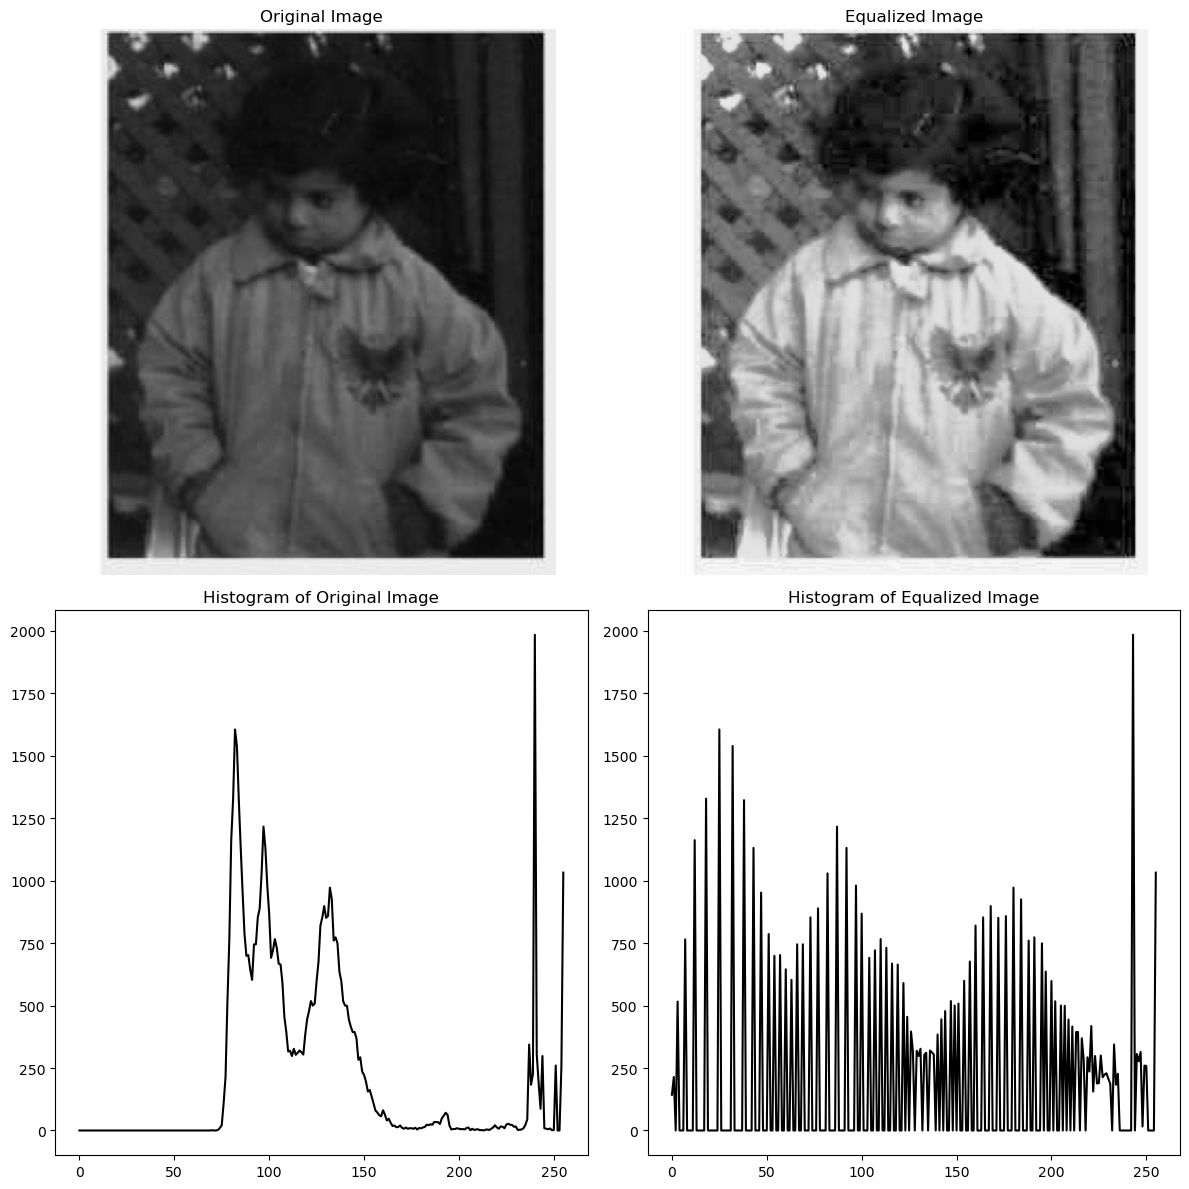

In [4]:
# Plotting the original image, equalized image, and their histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Display Original Image
axs[0, 0].imshow(pout_dark, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Display Equalized Image
axs[0, 1].imshow(equalized_image_manual, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

# Histogram of Original Image
axs[1, 0].plot(bins[:-1], hist, color='black')
axs[1, 0].set_title('Histogram of Original Image')

# Histogram of Equalized Image
equalized_hist, equalized_bins = np.histogram(equalized_image_manual.flatten(), bins=256, range=[0, 256])
axs[1, 1].plot(equalized_bins[:-1], equalized_hist, color='black')
axs[1, 1].set_title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()

### Using Inbuilt Function

In [5]:
equalized_image_opencv = cv2.equalizeHist(pout_dark)

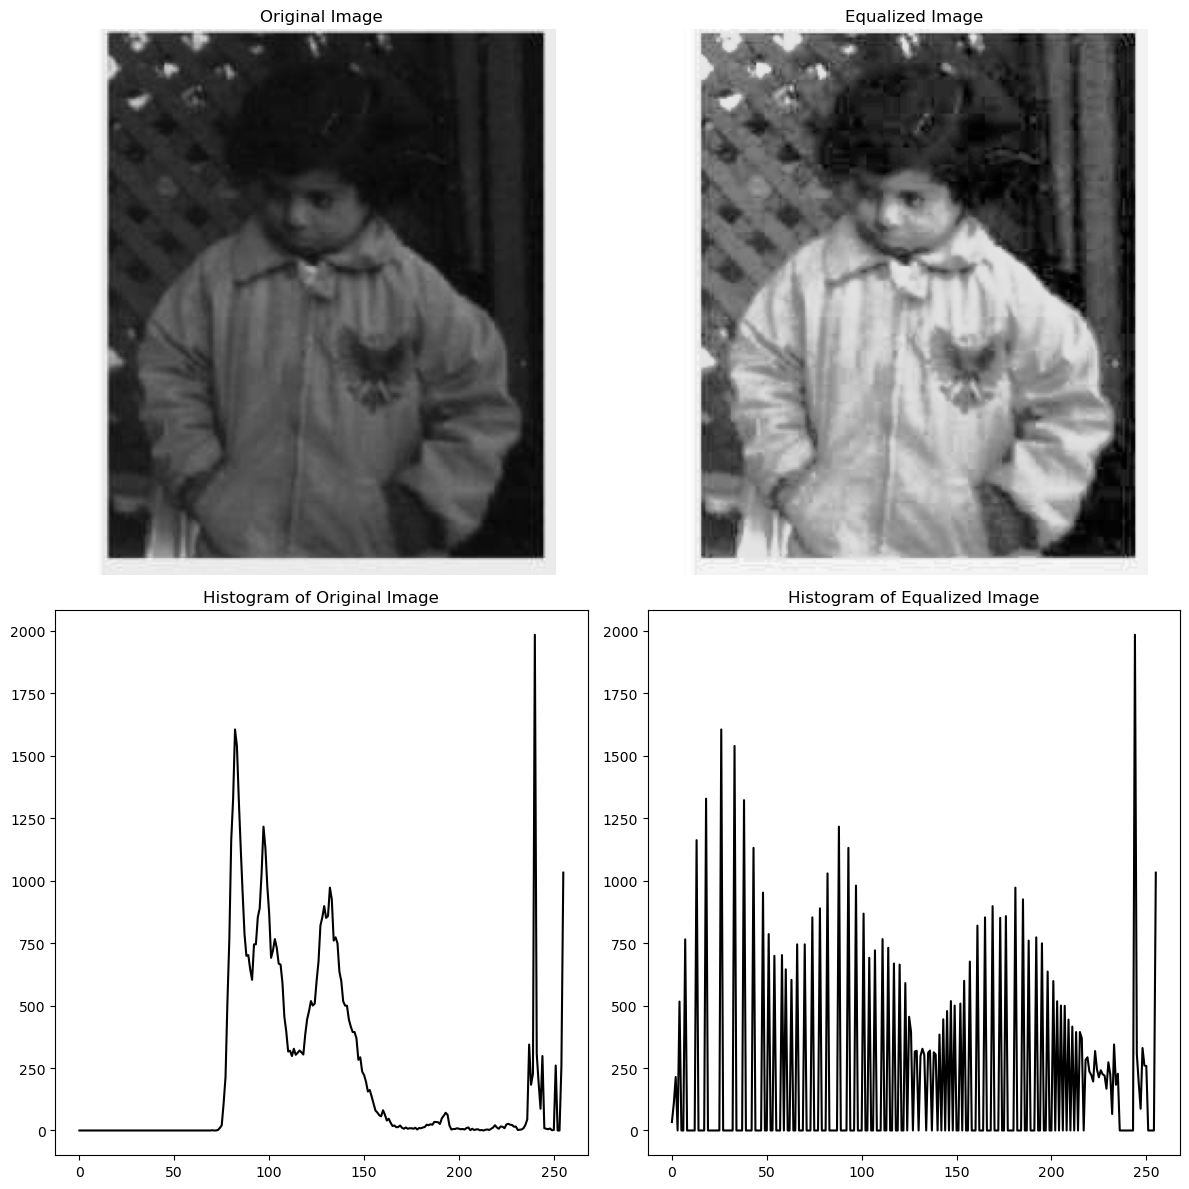

In [6]:
# Plotting the original image, equalized image, and their histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Display Original Image
axs[0, 0].imshow(pout_dark, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Display Equalized Image
axs[0, 1].imshow(equalized_image_opencv, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

# Histogram of Original Image
axs[1, 0].plot(bins[:-1], hist, color='black')
axs[1, 0].set_title('Histogram of Original Image')

# Histogram of Equalized Image
equalized_hist, equalized_bins = np.histogram(equalized_image_opencv.flatten(), bins=256, range=[0, 256])
axs[1, 1].plot(equalized_bins[:-1], equalized_hist, color='black')
axs[1, 1].set_title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()

### Differnce Between manual and In-Built Function

In [7]:
mse = np.mean((equalized_image_manual - equalized_image_opencv) ** 2)
print(f"Mean Squared Error (MSE) between Manual and OpenCV Equalized Images: {mse}")

Mean Squared Error (MSE) between Manual and OpenCV Equalized Images: 0.56573362797713


## Histogram Matching

### Loading Images

In [8]:
pout_dark = cv2.imread('images/pout-dark.jpg', cv2.IMREAD_GRAYSCALE)
pout_bright = cv2.imread('images/pout-bright.jpg', cv2.IMREAD_GRAYSCALE)

In [9]:
desired_shape = (pout_bright.shape[1], pout_bright.shape[0])
pout_dark = cv2.resize(pout_dark, desired_shape)

### Manual Function

In [10]:
def histogram_matching(source, reference):
    
    source_hist, bins_source = np.histogram(source.flatten(), bins=256, range=[0, 256], density=True)
    reference_hist, bins_reference = np.histogram(reference.flatten(), bins=256, range=[0, 256], density=True)
    
    # Compute the CDFs
    source_cdf = np.cumsum(source_hist)
    reference_cdf = np.cumsum(reference_hist)
    
    # Normalize the CDFs to range [0, 1]
    source_cdf_normalized = source_cdf / source_cdf[-1]
    reference_cdf_normalized = reference_cdf / reference_cdf[-1]
    
    # Create a mapping from source CDF to reference CDF
    mapping = np.interp(source_cdf_normalized, reference_cdf_normalized, bins_reference[:-1])
    
    # Map the pixels of the source image to the target histogram
    matched_image = np.interp(source.flatten(), bins_source[:-1], mapping).reshape(source.shape)
    
    return matched_image.astype(np.uint8)


In [11]:
matched_image = histogram_matching(pout_dark, pout_bright)

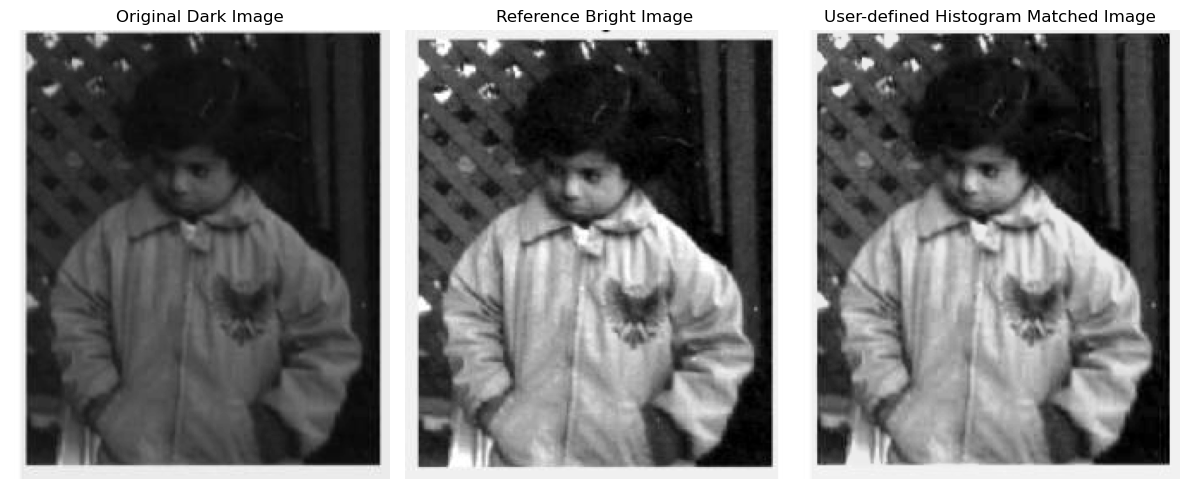

In [12]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(12, 12))

# Display Original Image (Dark Image)
axs[0].imshow(pout_dark, cmap='gray')
axs[0].set_title('Original Dark Image')
axs[0].axis('off')

# Display Reference Image (Bright Image)
axs[1].imshow(pout_bright, cmap='gray')
axs[1].set_title('Reference Bright Image')
axs[1].axis('off')

# Display User-defined Histogram Matched Image
axs[2].imshow(matched_image, cmap='gray')
axs[2].set_title('User-defined Histogram Matched Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

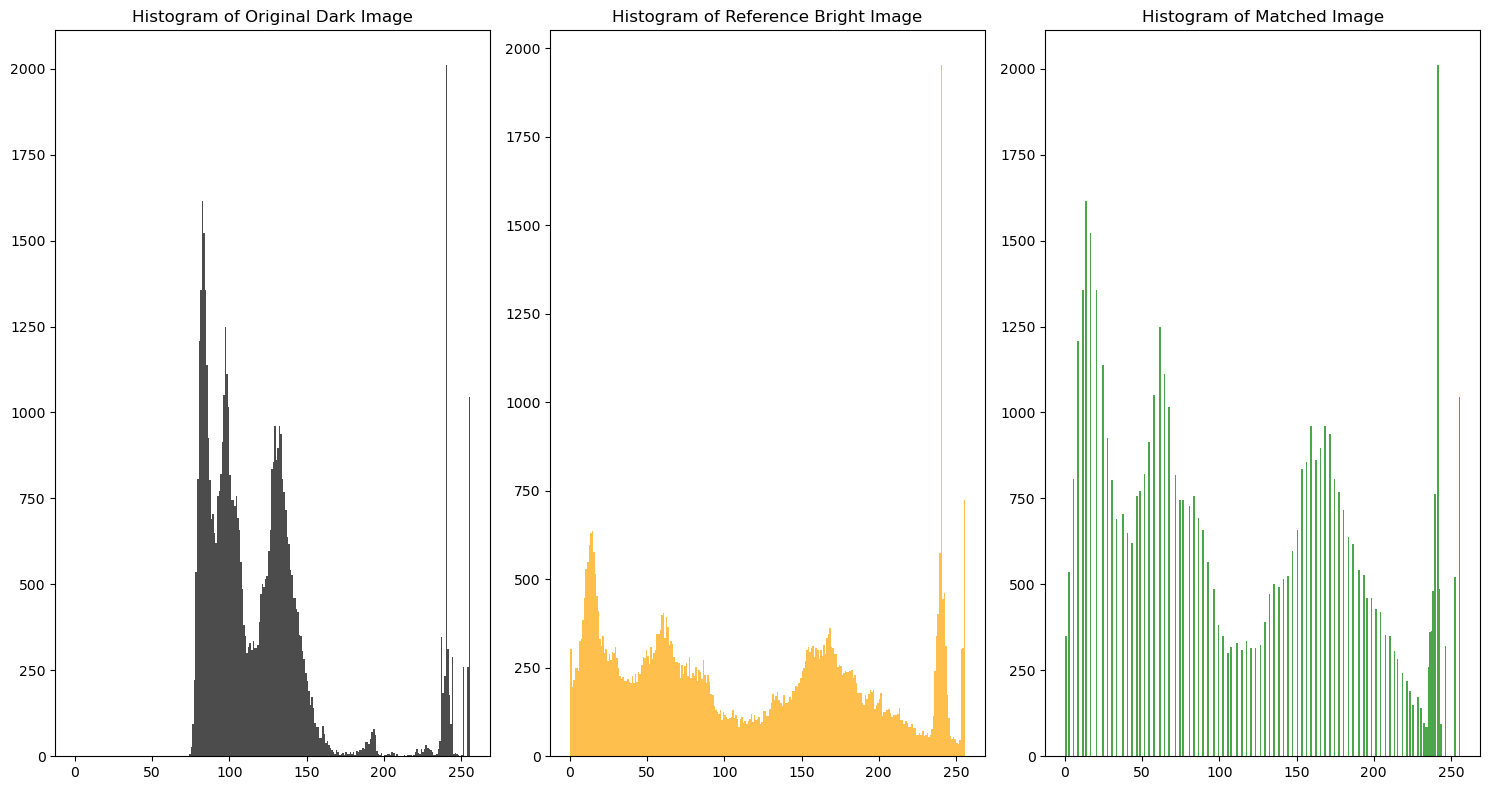

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))


# Plot the histograms of the three images
axs[0].hist(pout_dark.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
axs[0].set_title('Histogram of Original Dark Image')

axs[1].hist(pout_bright.flatten(), bins=256, range=[0, 256], color='orange', alpha=0.7)
axs[1].set_title('Histogram of Reference Bright Image')

axs[2].hist(matched_image.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
axs[2].set_title('Histogram of Matched Image')

plt.tight_layout()
plt.show()

In [14]:
mse = np.mean((pout_bright.astype(np.float32) - matched_image.astype(np.float32)) ** 2)
print(f"Mean Squared Error (MSE) between Reference and Matched Image: {mse}")

Mean Squared Error (MSE) between Reference and Matched Image: 1697.537841796875


### Use scikit Image Match Histogram Function

In [15]:
matched_image_builtin = match_histograms(pout_dark, pout_bright, channel_axis=None)

### Plotting

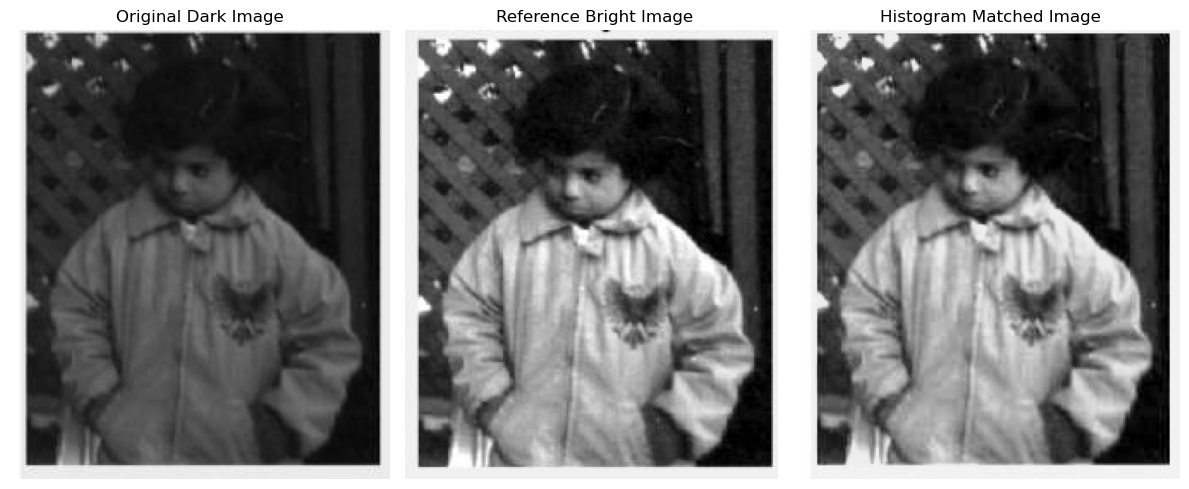

In [16]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(12, 12))

# Display Original Image (Dark Image)
axs[0].imshow(pout_dark, cmap='gray')
axs[0].set_title('Original Dark Image')
axs[0].axis('off')

# Display Reference Image (Bright Image)
axs[1].imshow(pout_bright, cmap='gray')
axs[1].set_title('Reference Bright Image')
axs[1].axis('off')

# Display User-defined Histogram Matched Image
axs[2].imshow(matched_image_builtin, cmap='gray')
axs[2].set_title('Histogram Matched Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

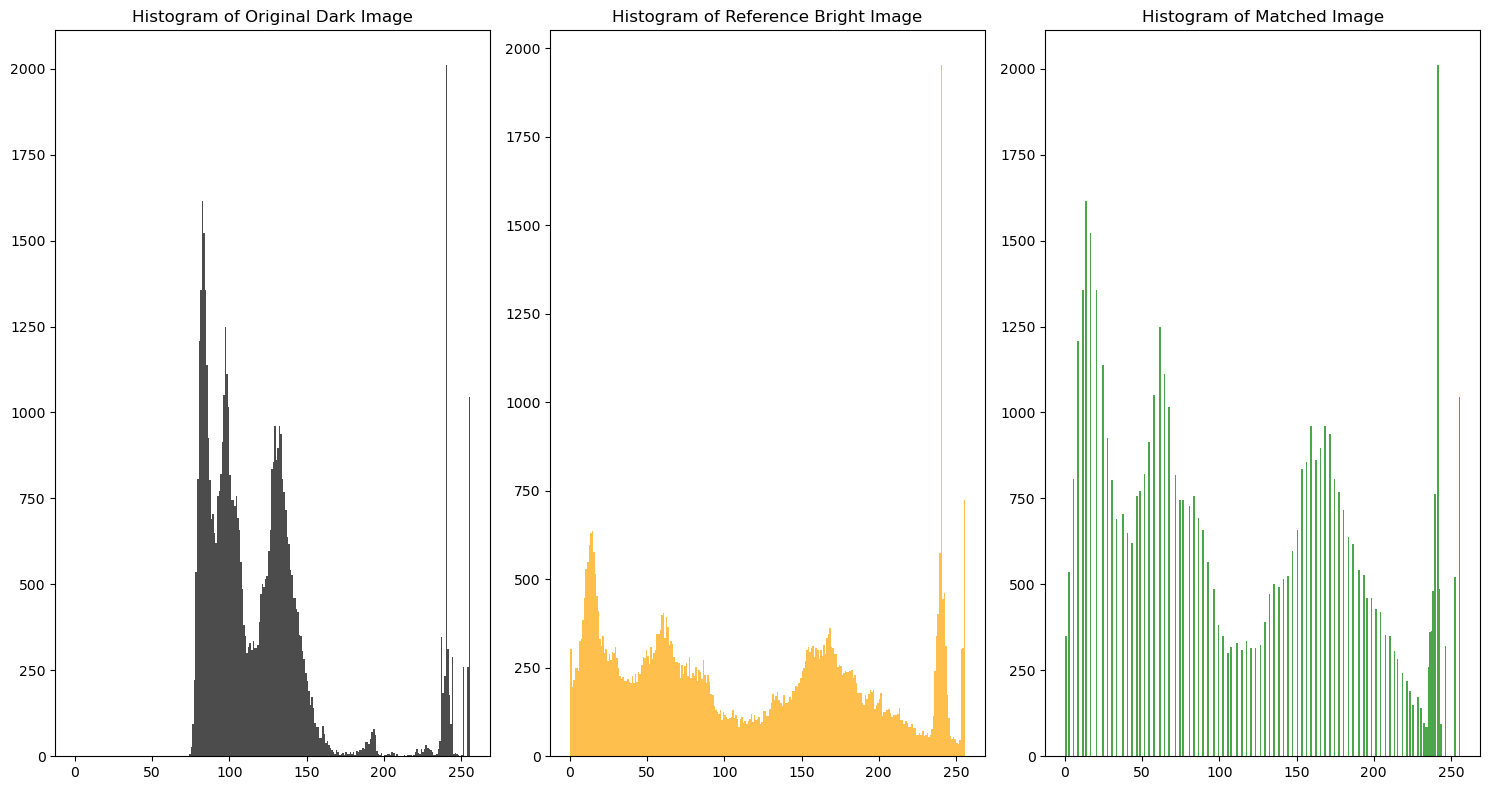

In [17]:
# Plot the histograms of the three images
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

axs[0].hist(pout_dark.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
axs[0].set_title('Histogram of Original Dark Image')

axs[1].hist(pout_bright.flatten(), bins=256, range=[0, 256], color='orange', alpha=0.7)
axs[1].set_title('Histogram of Reference Bright Image')

axs[2].hist(matched_image_builtin.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
axs[2].set_title('Histogram of Matched Image')

plt.tight_layout()
plt.show()

In [18]:
# Compute MSE between the reference and matched image
mse = np.mean((pout_bright.astype(np.float32) - matched_image.astype(np.float32)) ** 2)
print(f"Mean Squared Error (MSE) between Reference and Matched Image: {mse}")

Mean Squared Error (MSE) between Reference and Matched Image: 1697.537841796875


### Calculate MSE between In-Built and Manual Function

In [19]:
mse = np.mean((matched_image_builtin.astype(np.float32) - matched_image.astype(np.float32)) ** 2)
print(f"Mean Squared Error (MSE) between Reference and Matched Image: {mse}")

Mean Squared Error (MSE) between Reference and Matched Image: 0.3611000180244446
